In [243]:
import pandas as pd
from datetime import datetime as dt
import warnings
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

In [244]:
dates_map = {
	1:'Segunda',
	2:'Terça',
	3:'Quarta',
	4:'Quinta',
	5:'Sexta',
	6:'Sábado',
	7:'Domingo'
}

produtos_map ={
	'BANANA PRATA / BRANCA':'Banana-prata',
	'LARANJA SUCO':'Laranja Suco',
	'MACA GALA CX PLAST':'Maçã Gala',
	'MELANCIA':'Melancia',
	'MORANGO':'Morango',
	'BROCOLIS':'Brócolis',
	'MORANGA CABOTIA PRETA':'Moranga Cabotiá',
	'PIMENTAO':'Pimentão Verde',
	'BATATA INGLESA': 'Batata Branca',
	'CEBOLA NACIONAL':'Cebola Nacional',
	'CENOURA':'Cenoura',
	'BATATA-DOCE':'Batata-doce',
	'TOMATE CAQUI LONGA VIDA':'Tomate Longa Vida'
}


In [245]:
df = pd.read_csv('dados_cotacao.csv', sep=';', parse_dates=['data'])
df['data'] = df['data'].astype('datetime64[ns]')
df = df.sort_values(by=['data','produto'])
df['dia_da_semana'] = df['data'].apply(lambda x: dt.isoweekday(x))
df['dia_da_semana'] = df['dia_da_semana'].map(dates_map)
df = df.loc[df['dia_da_semana'] == 'Quinta']
df['produto'] = df['produto'].apply(lambda x: x[6:])
df['produto'] = df['produto'].map(produtos_map)

In [246]:
produto_str = 'Pimentão Verde'
df_produto = df.copy(deep=True)
df_produto = df_produto.loc[df_produto['produto'] == produto_str]
# df_produto['Média Móvel 3'] = df_produto['preco'].rolling(3).mean()
# df_produto['Média Móvel 7'] = df_produto['preco'].rolling(7).mean()
df_produto.head()

,data,produto,unidade,preco,dia_da_semana
151,2021-01-07,Pimentão Verde,KG,3.00,Quinta
19,2021-01-21,Pimentão Verde,KG,2.25,Quinta
43,2021-02-18,Pimentão Verde,KG,2.00,Quinta
595,2021-03-11,Pimentão Verde,KG,5.00,Quinta
67,2021-03-18,Pimentão Verde,KG,3.00,Quinta


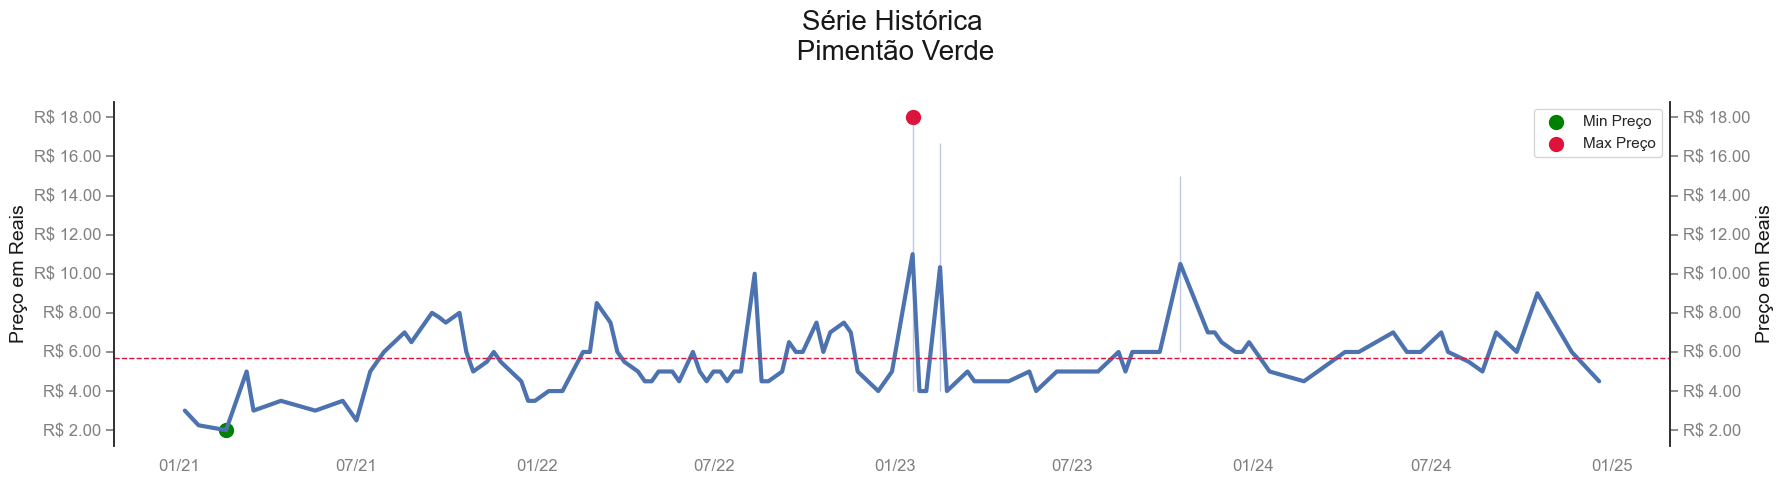

In [247]:
# Função de formatação personalizada
def reais(x, pos):
	return f'R$ {x:,.2f}'

# Configura o tema
sns.set_theme(style='white')

# Cria a figura e os eixos
fig, ax = plt.subplots(figsize=(18, 5))
ax2 = ax.twinx()  # Cria um segundo eixo y compartilhando o mesmo eixo x

# Calcula a média
media = df_produto['preco'].mean()

# Calcula os valores mínimo e máximo
min_val = df_produto['preco'].min()
max_val = df_produto['preco'].max()

# Encontra as datas correspondentes aos valores mínimo e máximo
min_date = df_produto.loc[df_produto['preco'] == min_val, 'data'].values[0]
max_date = df_produto.loc[df_produto['preco'] == max_val, 'data'].values[0]

# Plota a linha principal
sns.lineplot(data=df_produto, x='data', y='preco', ax=ax, linewidth=3)
ax.axhline(y=media, color='crimson', linestyle='dashed', linewidth=1)

# Remove a borda superior e direita
sns.despine(fig, ax=ax, right=False)

# Copia a linha principal para o segundo eixo
sns.lineplot(data=df_produto, x='data', y='preco', ax=ax2, linewidth=3, alpha=0)
ax2.axhline(y=media, color='darkgrey', linestyle='dashed', linewidth=1, alpha=0)  # Não queremos duplicar a linha de média

# Adiciona círculos para destacar o menor e o maior valor
ax.scatter(min_date, min_val, color='green', s=100, label='Min Preço')
ax.scatter(max_date, max_val, color='crimson', s=100, label='Max Preço')

# Adiciona a legenda
ax.legend(loc='best')

# Define o título e o estilo do título
ax.set_title(f'Série Histórica\n {produto_str}', fontsize=20, color="#181819", loc='center', pad=30)
ax.set_xlabel('')
ax.set_ylabel('Preço em Reais', fontsize=14, color="#181819")
ax2.set_ylabel('Preço em Reais', fontsize=14, color="#181819")

# Ajusta o formato do eixo X para Mês/Ano com ano de 2 dígitos
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))

# Ajusta o formato do eixo Y para Reais
ax.yaxis.set_major_formatter(ticker.FuncFormatter(reais))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(reais))

# Ajusta o tamanho das marcas dos eixos
ax.tick_params(axis='both', which='major', labelsize=12, colors='gray')
ax2.tick_params(axis='both', which='major', labelsize=12, colors='gray')

# Ajusta a cor dos spines
ax.spines['left'].set_color('gray')
ax.spines['right'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['top'].set_color('gray')

# Ajusta para layout correto
sns.despine(bottom=True, right=False)
plt.tight_layout()
plt.show()


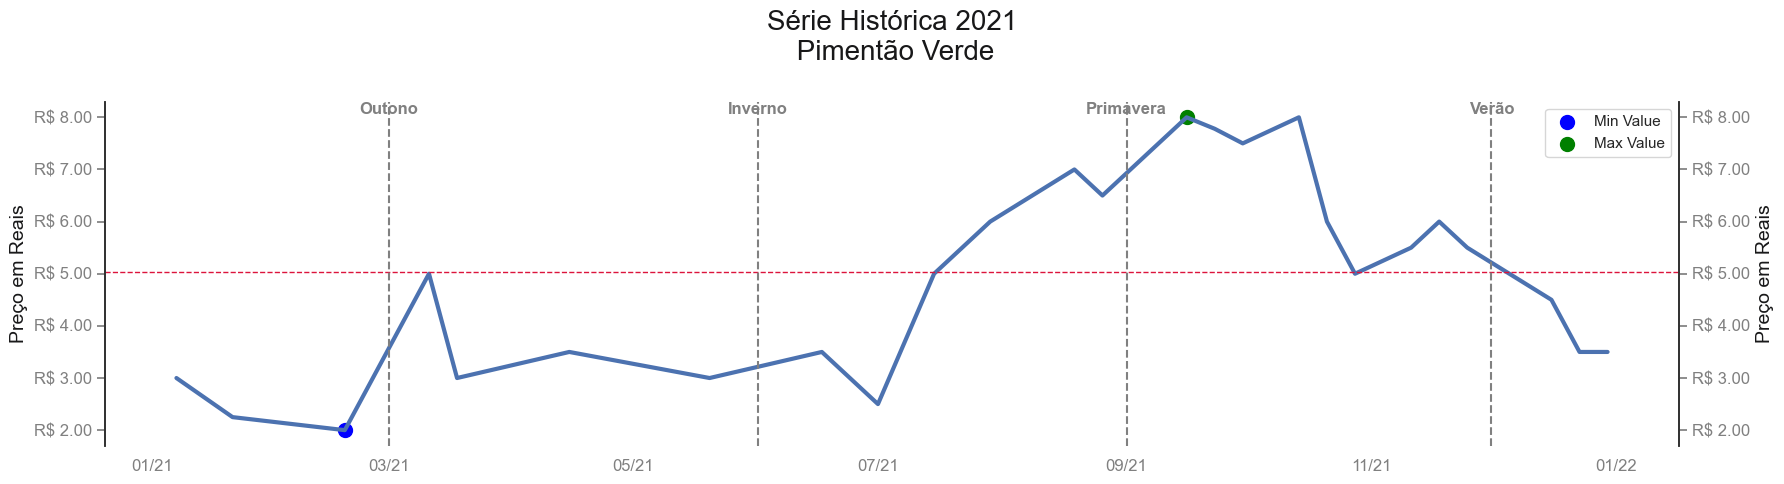

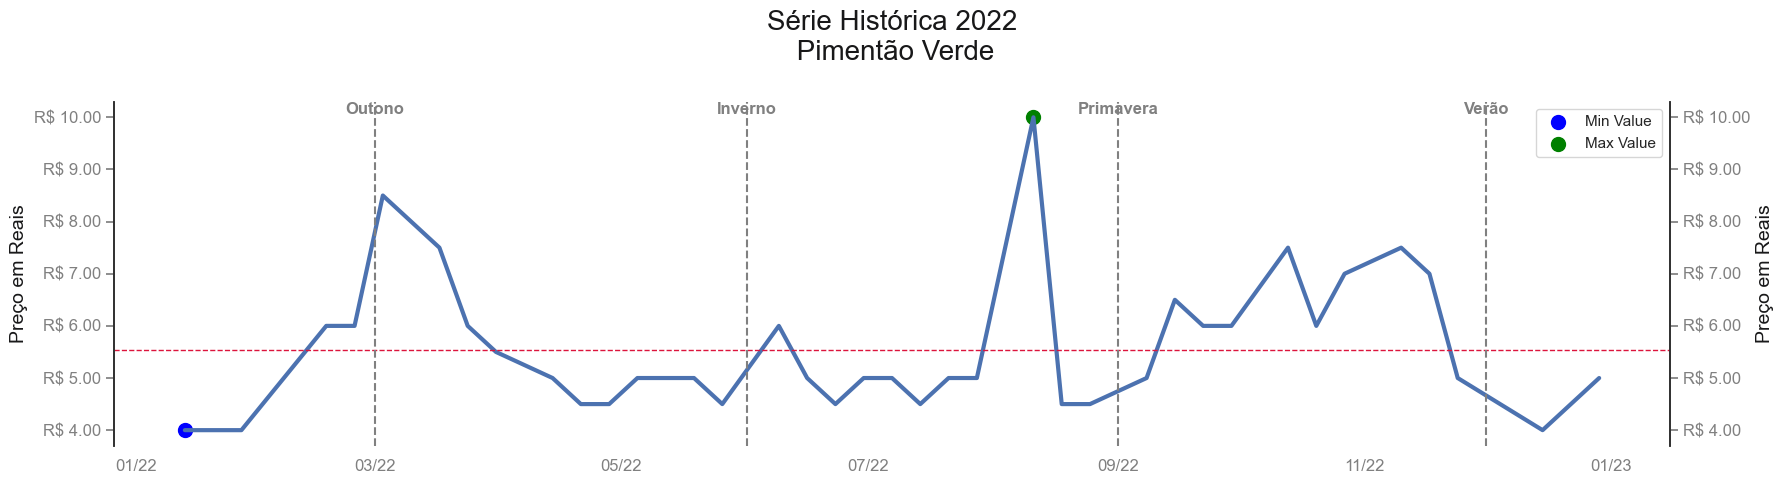

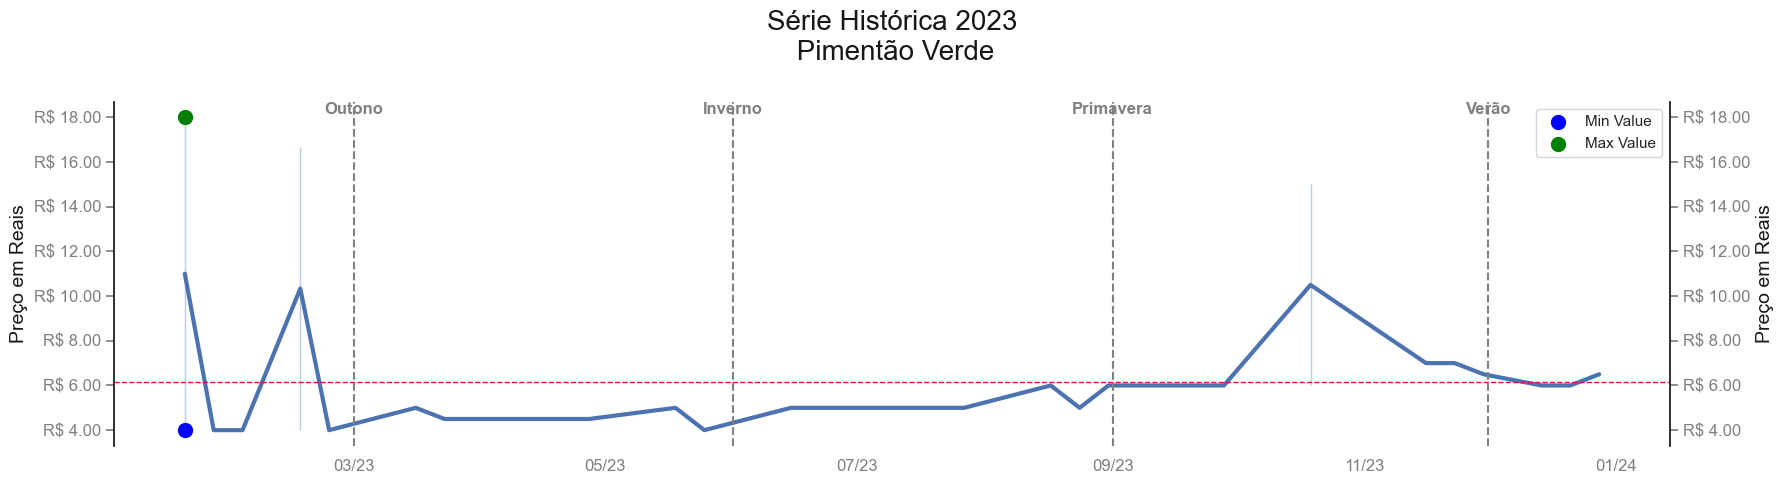

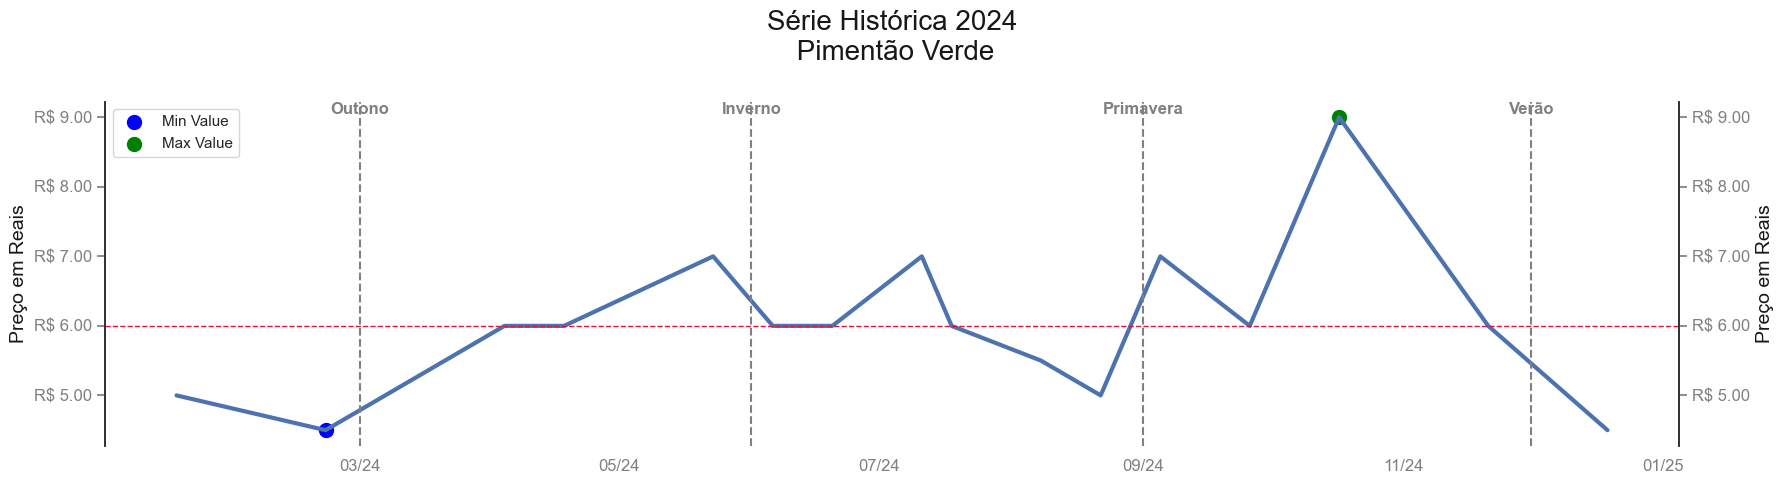

In [248]:
# Função de formatação personalizada
def reais(x, pos):
	return f'R$ {x:,.2f}'

# Configura o tema
sns.set_theme(style='white')

# Adiciona nova coluna 'Ano' ao DataFrame
df_produto['Ano'] = df_produto['data'].dt.year

# Cria a figura e os eixos para cada ano
for year in df_produto['Ano'].unique():
	fig, ax = plt.subplots(figsize=(18, 5))
	ax2 = ax.twinx()  # Cria um segundo eixo y compartilhando o mesmo eixo x

	# Filtra os dados para o ano atual
	df_year = df_produto[df_produto['Ano'] == year]

	# Calcula a média para o ano atual
	media = df_year['preco'].mean()

	# Calcula os valores mínimo e máximo para o ano atual
	min_val = df_year['preco'].min()
	max_val = df_year['preco'].max()

	# Encontra as datas correspondentes aos valores mínimo e máximo
	min_date = df_year.loc[df_year['preco'] == min_val, 'data'].values[0]
	max_date = df_year.loc[df_year['preco'] == max_val, 'data'].values[0]

	# Plota a linha principal
	sns.lineplot(data=df_year, x='data', y='preco', ax=ax, linewidth=3)
	ax.axhline(y=media, color='crimson', linestyle='dashed', linewidth=1)

	# Remove a borda superior e direita
	sns.despine(fig, ax=ax, right=False)

	# Copia a linha principal para o segundo eixo
	sns.lineplot(data=df_year, x='data', y='preco', ax=ax2, linewidth=3, alpha=0)
	ax2.axhline(y=media, color='crimson', linestyle='dashed', linewidth=1, alpha=0)  # Não queremos duplicar a linha de média

	# Adiciona círculos para destacar o menor e o maior valor
	ax.scatter(min_date, min_val, color='blue', s=100, label='Min Value')
	ax.scatter(max_date, max_val, color='green', s=100, label='Max Value')

	# Adiciona a legenda
	ax.legend(loc='best')

	# Adiciona linhas verticais para marcar o início das estações
	estacoes = {'Verão': '12-01', 'Outono': '03-01', 'Inverno': '06-01', 'Primavera': '09-01'}
	for estacao, mes in estacoes.items():
		ax.axvline(pd.Timestamp(f'{year}-{mes}'), color='gray', linestyle='--')
		ax.text(pd.Timestamp(f'{year}-{mes}'), ax.get_ylim()[1], estacao, ha='center', va='top', fontsize=12, color='gray', weight='bold')

	# Define o título e o estilo do título
	ax.set_title(f'Série Histórica {year}\n {produto_str}', fontsize=20, color="#181819", loc='center', pad=30)
	ax.set_xlabel('')
	ax.set_ylabel('Preço em Reais', fontsize=14, color="#181819")
	ax2.set_ylabel('Preço em Reais', fontsize=14, color="#181819")

	# Ajusta o formato do eixo X para Mês/Ano com ano de 2 dígitos
	ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))

	# Ajusta o formato do eixo Y para Reais
	ax.yaxis.set_major_formatter(ticker.FuncFormatter(reais))
	ax2.yaxis.set_major_formatter(ticker.FuncFormatter(reais))

	# Ajusta o tamanho das marcas dos eixos
	ax.tick_params(axis='both', which='major', labelsize=12, colors='gray')
	ax2.tick_params(axis='both', which='major', labelsize=12, colors='gray')

	# Ajusta a cor dos spines
	ax.spines['left'].set_color('gray')
	ax.spines['right'].set_color('gray')
	ax.spines['bottom'].set_color('gray')
	ax.spines['top'].set_color('gray')

	# Ajusta para layout correto
	sns.despine(bottom=True, right=False)
	plt.tight_layout()
	plt.show()


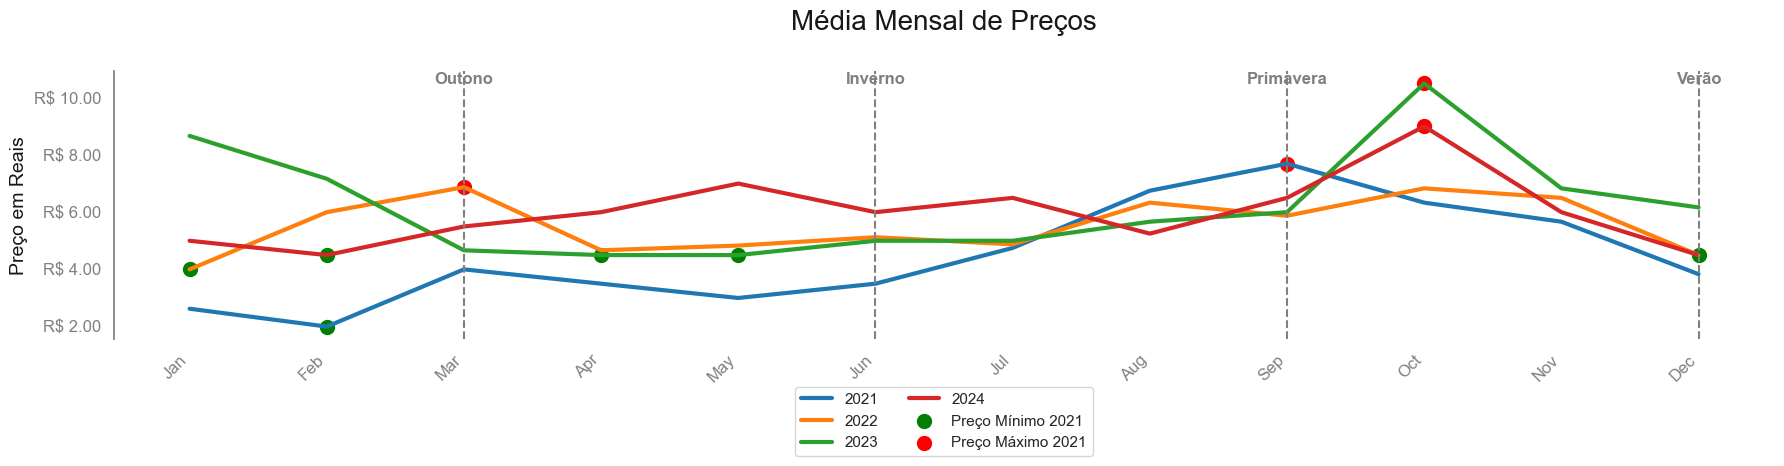

In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Função de formatação personalizada
def reais(x, pos):
	return f'R$ {x:,.2f}'

# Configura o tema
sns.set_theme(style='white')

# Adiciona novas colunas 'Ano' e 'Mês' ao DataFrame
df_produto['Ano'] = df_produto['data'].dt.year
df_produto['Mês'] = df_produto['data'].dt.month

# Calcula a média mensal
df_monthly_mean = df_produto.groupby(['Ano', 'Mês'])['preco'].mean().reset_index()

# Cria um dicionário para mapear números dos meses para os nomes das abreviações
mes_abbr = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df_monthly_mean['Month'] = df_monthly_mean['Mês'].map(mes_abbr)

# Cria a figura e os eixos
fig, ax = plt.subplots(figsize=(18, 5))

# Plota as linhas para cada ano
sns.lineplot(data=df_monthly_mean, x='Mês', y='preco', hue='Ano', palette='tab10', ax=ax, linewidth=3)

# Adiciona círculos para destacar os menores e maiores valores
min_vals = df_monthly_mean.groupby('Ano')['preco'].min()
max_vals = df_monthly_mean.groupby('Ano')['preco'].max()

for year in df_monthly_mean['Ano'].unique():
	min_val = df_monthly_mean[(df_monthly_mean['Ano'] == year) & (df_monthly_mean['preco'] == min_vals[year])]
	max_val = df_monthly_mean[(df_monthly_mean['Ano'] == year) & (df_monthly_mean['preco'] == max_vals[year])]
	ax.scatter(min_val['Mês'], min_val['preco'], color='green', s=100, label=f'Preço Mínimo {year}' if year == df_monthly_mean['Ano'].unique()[0] else "")
	ax.scatter(max_val['Mês'], max_val['preco'], color='red', s=100, label=f'Preço Máximo {year}' if year == df_monthly_mean['Ano'].unique()[0] else "")

# Remove entradas duplicadas na legenda
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Adiciona linhas verticais para marcar o início das estações do hemisfério sul
estacoes = {'Verão': 12, 'Outono': 3, 'Inverno': 6, 'Primavera': 9}

for estacao, mes in estacoes.items():
	ax.axvline(x=mes, color='gray', linestyle='--')
	ax.text(x=mes, y=ax.get_ylim()[1], s=estacao, ha='center', va='top', fontsize=12, color='gray', weight='bold')

# Define o título e o estilo do título
ax.set_title(f'Média Mensal de Preços', fontsize=20, color="#181819", loc='center', pad=30)
ax.set_xlabel('')
ax.set_ylabel('Preço em Reais', fontsize=14, color="#181819")

# Ajusta o formato do eixo X para mostrar apenas os meses
ax.set_xticks(range(1, 13))
ax.set_xticklabels([mes_abbr[m] for m in range(1, 13)], rotation=45, ha='right')

# Ajusta o formato do eixo Y para Reais
ax.yaxis.set_major_formatter(ticker.FuncFormatter(reais))

# Ajusta o tamanho das marcas dos eixos
ax.tick_params(axis='both', which='major', labelsize=12, colors='gray')

# Ajusta a cor dos spines
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['top'].set_color('gray')

# Ajusta para layout correto
sns.despine(bottom=True)
plt.tight_layout()
plt.show()


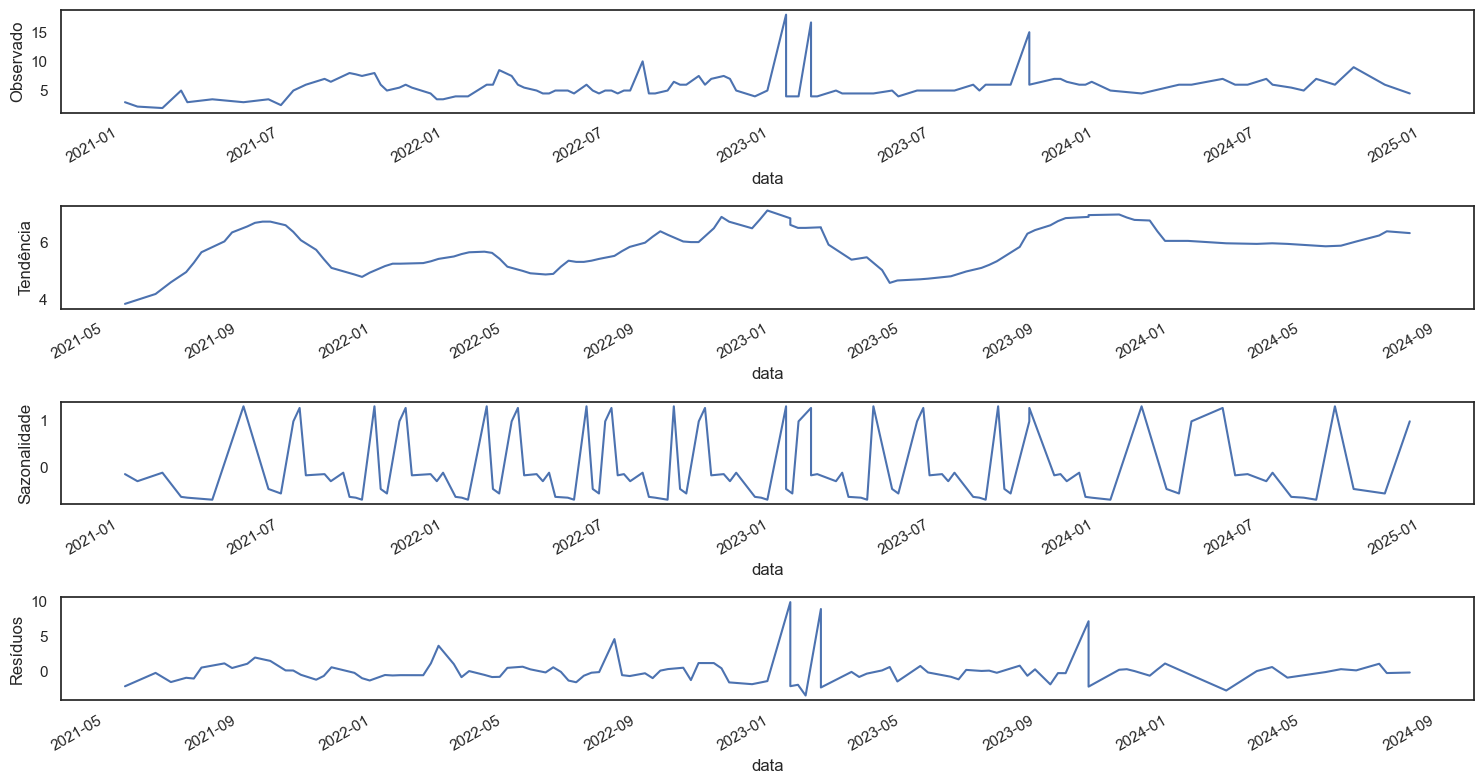

In [250]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Certifique-se de que a coluna 'data' é do tipo datetime e defina o índice
df_produto['data'] = pd.to_datetime(df_produto['data'])
df_produto.set_index('data', inplace=True)

# Realize a decomposição da série temporal
result = sm.tsa.seasonal_decompose(df_produto['preco'], model='additive', period=12)

# Faça a plotagem dos componentes
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 8))
result.observed.plot(ax=ax1, legend=False)
ax1.set_ylabel('Observado')
result.trend.plot(ax=ax2, legend=False)
ax2.set_ylabel('Tendência')
result.seasonal.plot(ax=ax3, legend=False)
ax3.set_ylabel('Sazonalidade')
result.resid.plot(ax=ax4, legend=False)
ax4.set_ylabel('Resíduos')
plt.tight_layout()
plt.show()


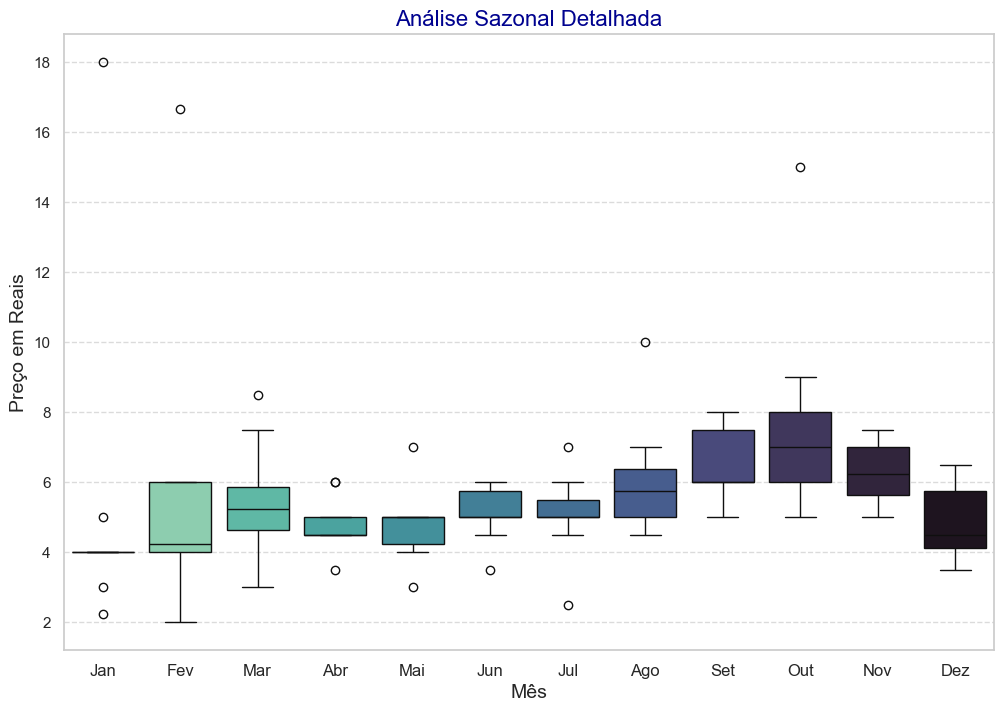

In [251]:
# Agrupe os dados mensais e faça a média
df_produto['mes'] = df_produto.index.month
seasonal_df = df_produto.groupby('mes')['preco'].mean().reset_index()

# Configure o tema
sns.set_theme(style='whitegrid')

# Plotar a sazonalidade detalhada com boxplots, melhorando a visualização
plt.figure(figsize=(12, 8))
palette = sns.color_palette("mako_r", 12)  # Escolha uma paleta de cores
sns.boxplot(x='mes', y='preco', data=df_produto, palette=palette)
plt.title('Análise Sazonal Detalhada', fontsize=16, color='#00028F')
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Preço em Reais', fontsize=14)

# Adicionar rótulos personalizados para cada mês
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
plt.xticks(ticks=range(12), labels=meses, fontsize=12)

# Ajuste as marcações das bordas
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
